In [64]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [65]:
#fetching te data

In [66]:
df=pd.read_csv('customerchurn.csv')

In [67]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [68]:
#checking info about the data

In [69]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [70]:
df['customerID'].nunique()

7043

all the id are unique so dropping this column

In [71]:
df.drop('customerID',axis=1,inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


here TotalCharges is showing in object type but it should be in float type

In [73]:
df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.9        8
20.05       8
           ..
3171.6      1
1097.15     1
95.6        1
743.75      1
5643.4      1
Name: TotalCharges, Length: 6531, dtype: int64

data is missing here, fixxing it first

In [74]:
df.loc[df['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [75]:
#filling blank spaces

In [76]:
df['TotalCharges'].replace(" ",np.nan,inplace=True)

In [77]:
df['TotalCharges'].isnull().sum()

11

11 null values are there so we can drop them

In [78]:
df.dropna(inplace=True)

In [79]:
df['TotalCharges']=df['TotalCharges'].astype('float')

In [80]:
df.shape

(7032, 20)

In [81]:
#checking null values in the data set

In [82]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [83]:
#visualizing it by heatmap

<AxesSubplot:>

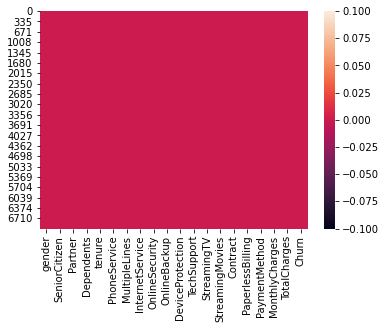

In [84]:
sns.heatmap(df.isnull())

no missing values are there

In [85]:
#checking every columns

In [86]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [87]:
df['gender'].nunique()

2

Male      3549
Female    3483
Name: gender, dtype: int64

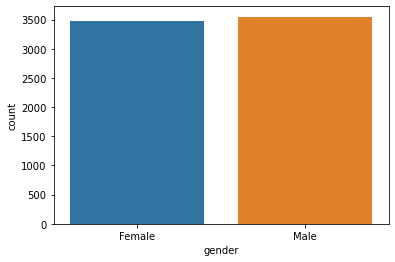

In [88]:
sns.countplot(df['gender'])
df['gender'].value_counts()

male no is little more than female but it is almost balanced

In [89]:
df['SeniorCitizen'].nunique()

2

In [90]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

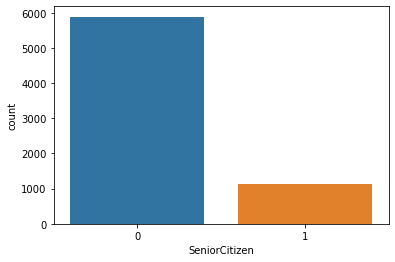

In [91]:
sns.countplot(df['SeniorCitizen'])

SeniorCitizen are less in numbers

In [92]:
df['Partner'].nunique()

2

No     3639
Yes    3393
Name: Partner, dtype: int64

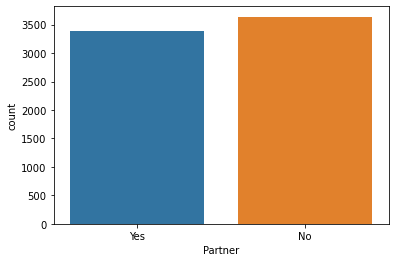

In [93]:
sns.countplot(df['Partner'])
df['Partner'].value_counts()

In [94]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

No     4933
Yes    2099
Name: Dependents, dtype: int64

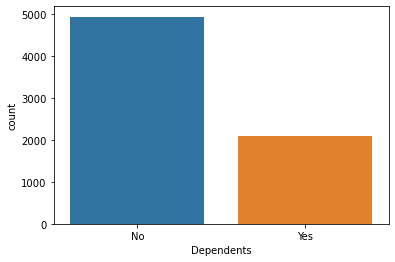

In [95]:
sns.countplot(df['Dependents'])
df['Dependents'].value_counts()

Majority of the customers doesn't have dependents

In [96]:
df['tenure'].nunique()

72

In [97]:
df['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

the avg. span of customers with us is 32.4 months, max. of 72 months/weeks, min. is 1 month

In [98]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

Yes    6352
No      680
Name: PhoneService, dtype: int64

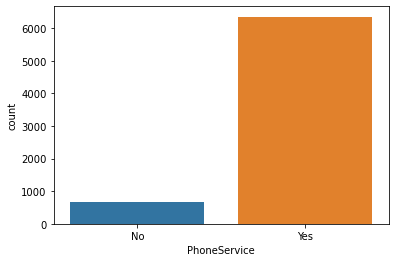

In [99]:
sns.countplot(df['PhoneService'])
df['PhoneService'].value_counts()

Majority of customers have phone service

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

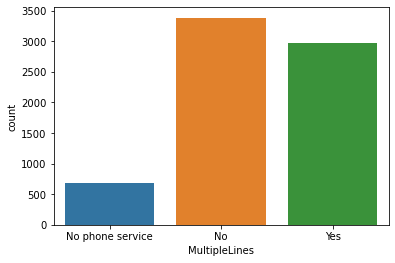

In [100]:
sns.countplot(df['MultipleLines'])
df['MultipleLines'].value_counts()

majority of customers are not opted for multiple lines

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

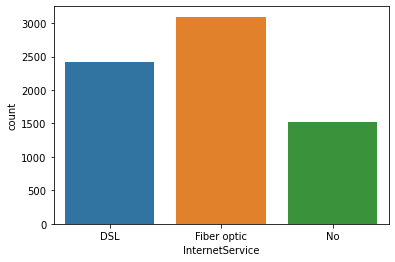

In [101]:
sns.countplot(df['InternetService'])
df['InternetService'].value_counts()

In [102]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [103]:
categorical_cols=['gender','Partner', 'Dependents','PhoneService', 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

gender:
 Male      3549
Female    3483
Name: gender, dtype: int64
Partner:
 No     3639
Yes    3393
Name: Partner, dtype: int64
Dependents:
 No     4933
Yes    2099
Name: Dependents, dtype: int64
PhoneService:
 Yes    6352
No      680
Name: PhoneService, dtype: int64
MultipleLines:
 No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
InternetService:
 Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
OnlineSecurity:
 No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
OnlineBackup:
 No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
DeviceProtection:
 No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
TechSupport:
 No                     3472
Yes                    2040
No internet ser

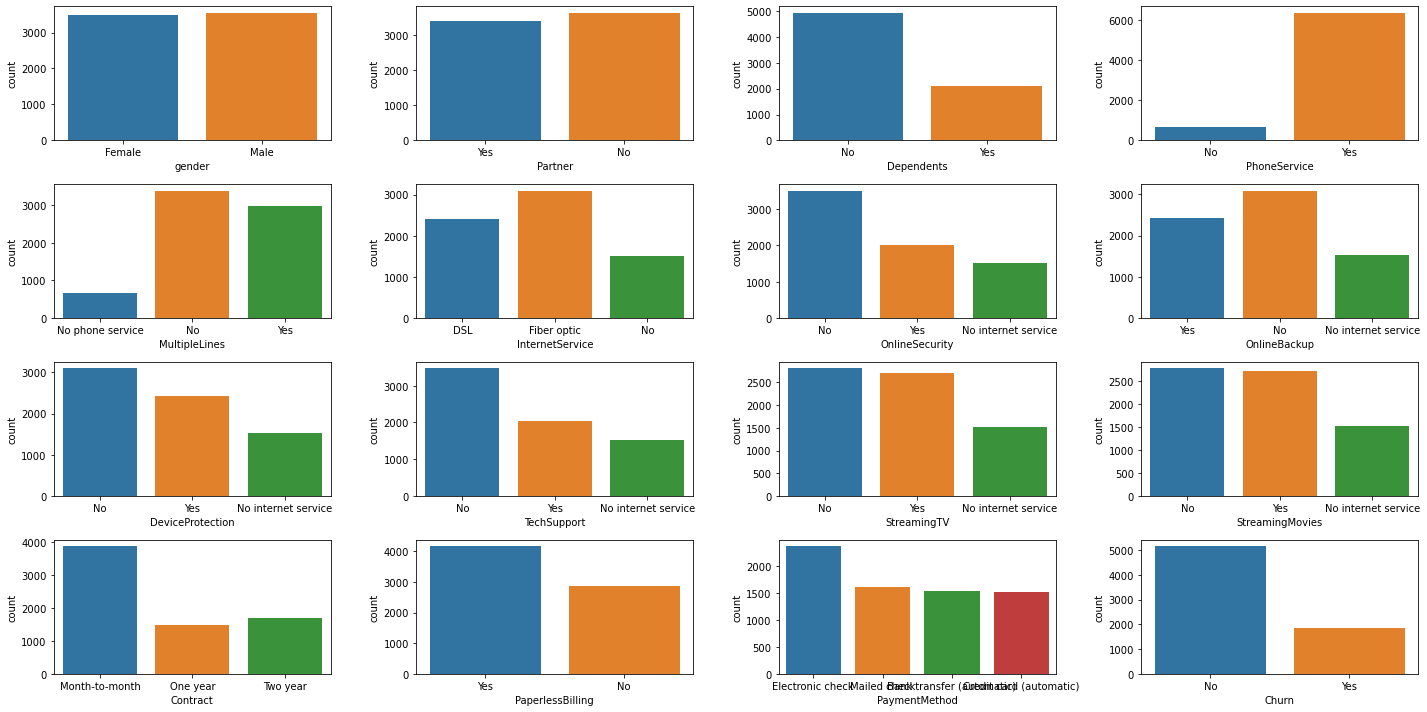

In [104]:
plt.figure(figsize=(20,10))
n=1
for i in categorical_cols:
    if n<17:
        print(f'{i}:\n',df[i].value_counts())
        ax=plt.subplot(4,4,n)
        sns.countplot(df[i])
        plt.xlabel(i)
    n+=1
plt.tight_layout()


In [105]:
numerical_cols=['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']

tenure:
 1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64
MonthlyCharges:
 20.05    61
19.90    44
19.95    44
19.85    44
19.65    43
         ..
39.95     1
18.55     1
39.55     1
18.75     1
97.25     1
Name: MonthlyCharges, Length: 1584, dtype: int64
TotalCharges:
 20.20      11
19.75       9
20.05       8
19.65       8
19.90       8
           ..
6424.70     1
1474.35     1
6668.35     1
6096.90     1
5867.00     1
Name: TotalCharges, Length: 6530, dtype: int64
SeniorCitizen:
 0    5890
1    1142
Name: SeniorCitizen, dtype: int64


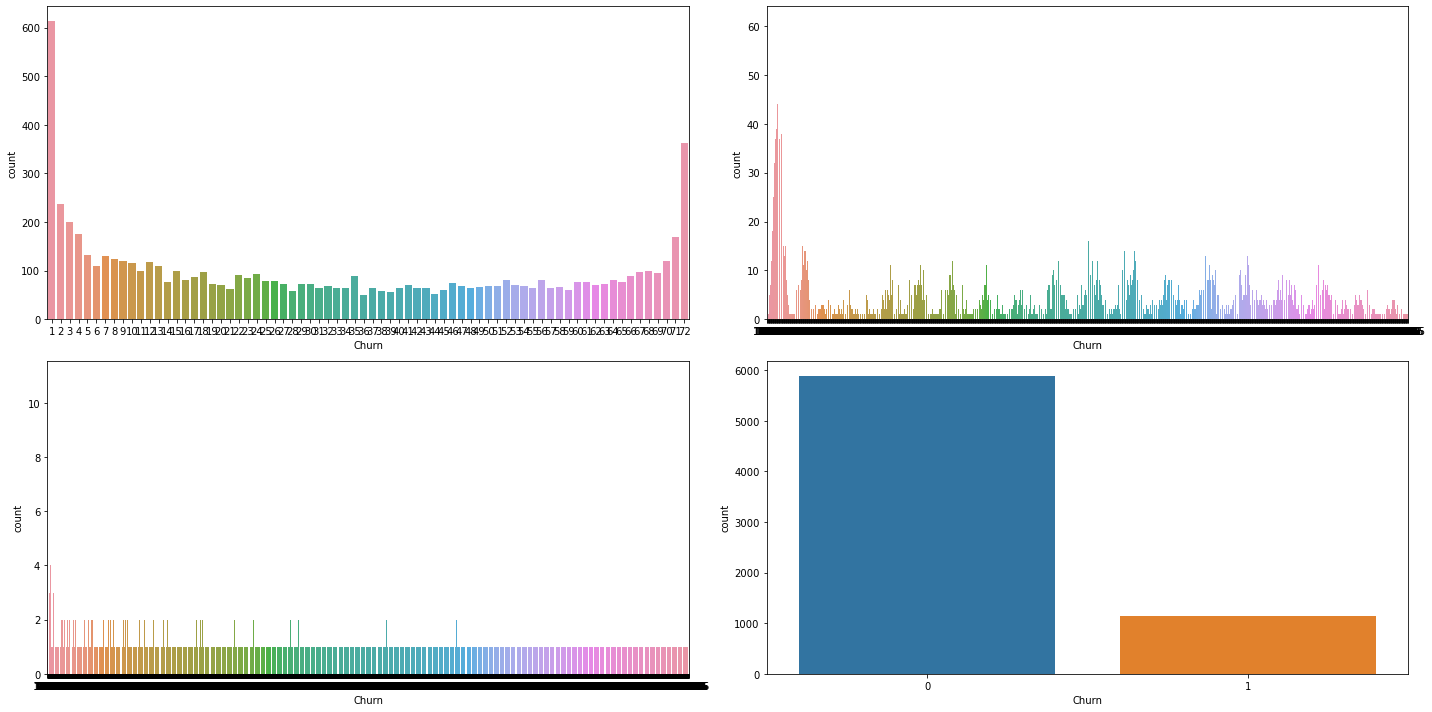

In [106]:
plt.figure(figsize=(20,10))
n=1
for k in numerical_cols:
    if n<5:
        print(f'{k}:\n',df[k].value_counts())
        ax=plt.subplot(2,2,n)
        sns.countplot(df[k])
        plt.xlabel(i)
    n+=1
plt.tight_layout()

In [108]:
#lets do label encoding for all categorical data

In [121]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=df.select_dtypes(include='object').columns
for i in cols:
    df[i]=le.fit_transform(df[i])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [122]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [124]:
#checking skewness
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

In [ ]:
#visualizing outliers

gender                 AxesSubplot(0.125,0.749828;0.168478x0.130172)
SeniorCitizen       AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Partner             AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Dependents          AxesSubplot(0.731522,0.749828;0.168478x0.130172)
tenure                 AxesSubplot(0.125,0.593621;0.168478x0.130172)
PhoneService        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
MultipleLines       AxesSubplot(0.529348,0.593621;0.168478x0.130172)
InternetService     AxesSubplot(0.731522,0.593621;0.168478x0.130172)
OnlineSecurity         AxesSubplot(0.125,0.437414;0.168478x0.130172)
OnlineBackup        AxesSubplot(0.327174,0.437414;0.168478x0.130172)
DeviceProtection    AxesSubplot(0.529348,0.437414;0.168478x0.130172)
TechSupport         AxesSubplot(0.731522,0.437414;0.168478x0.130172)
StreamingTV            AxesSubplot(0.125,0.281207;0.168478x0.130172)
StreamingMovies     AxesSubplot(0.327174,0.281207;0.168478x0.130172)
Contract            AxesSubplot(0.

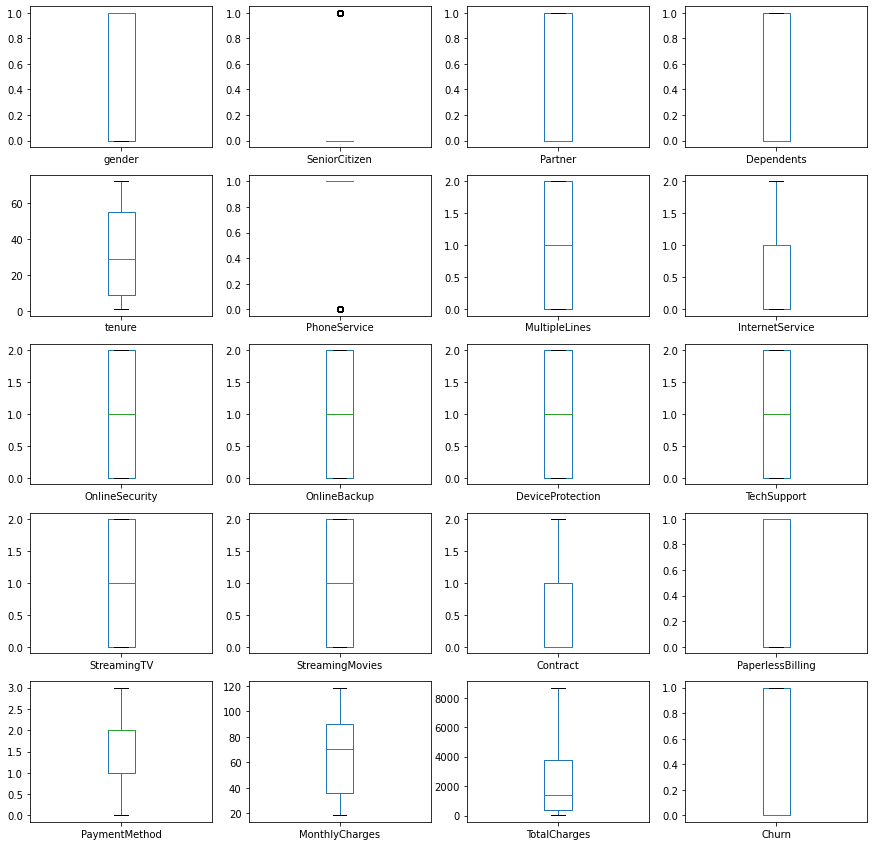

In [125]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(15,15))

In [126]:
#removing outliers using zscore

In [127]:
from scipy.stats import zscore
z=abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
print('Shape with outliers:',df.shape)
print('Shape after removing outliers:',df_new.shape)

Shape with outliers: (7032, 20)
Shape after removing outliers: (6352, 20)


gender                 AxesSubplot(0.125,0.749828;0.168478x0.130172)
SeniorCitizen       AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Partner             AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Dependents          AxesSubplot(0.731522,0.749828;0.168478x0.130172)
tenure                 AxesSubplot(0.125,0.593621;0.168478x0.130172)
PhoneService        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
MultipleLines       AxesSubplot(0.529348,0.593621;0.168478x0.130172)
InternetService     AxesSubplot(0.731522,0.593621;0.168478x0.130172)
OnlineSecurity         AxesSubplot(0.125,0.437414;0.168478x0.130172)
OnlineBackup        AxesSubplot(0.327174,0.437414;0.168478x0.130172)
DeviceProtection    AxesSubplot(0.529348,0.437414;0.168478x0.130172)
TechSupport         AxesSubplot(0.731522,0.437414;0.168478x0.130172)
StreamingTV            AxesSubplot(0.125,0.281207;0.168478x0.130172)
StreamingMovies     AxesSubplot(0.327174,0.281207;0.168478x0.130172)
Contract            AxesSubplot(0.

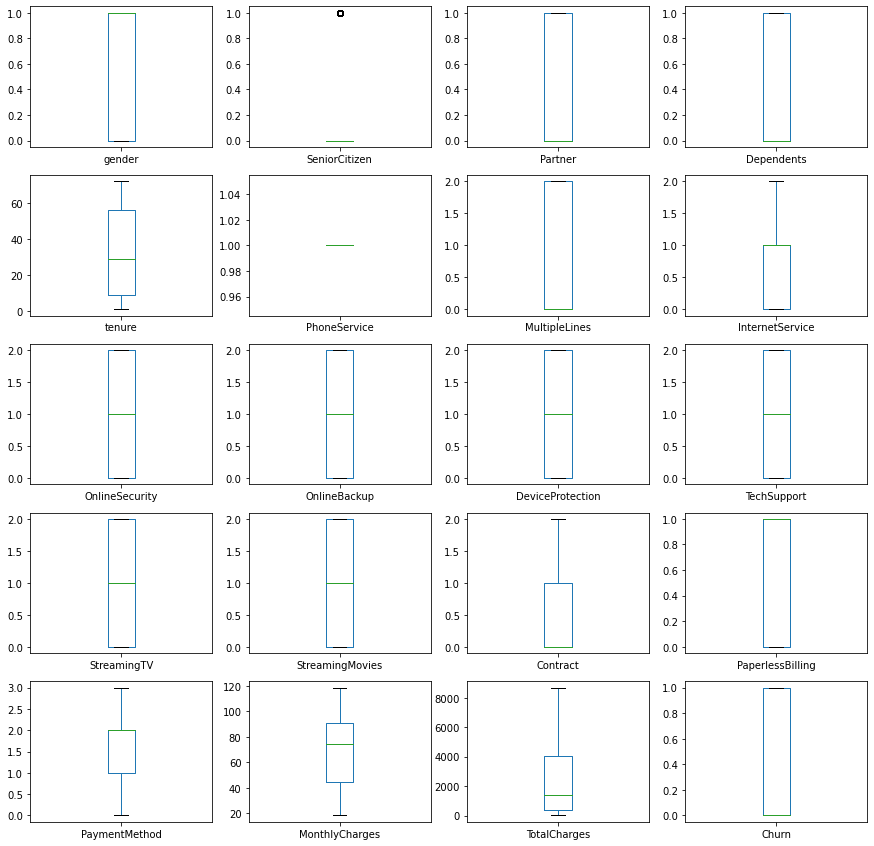

In [139]:
df_new.plot(kind='box',subplots=True,layout=(5,4),figsize=(15,15))

In [141]:
#using log transform for Phoneservice column
df_new['PhoneService']=np.log(df_new['PhoneService'])
df_new['PhoneService'].skew()

0

In [129]:
#checking corelation

<AxesSubplot:>

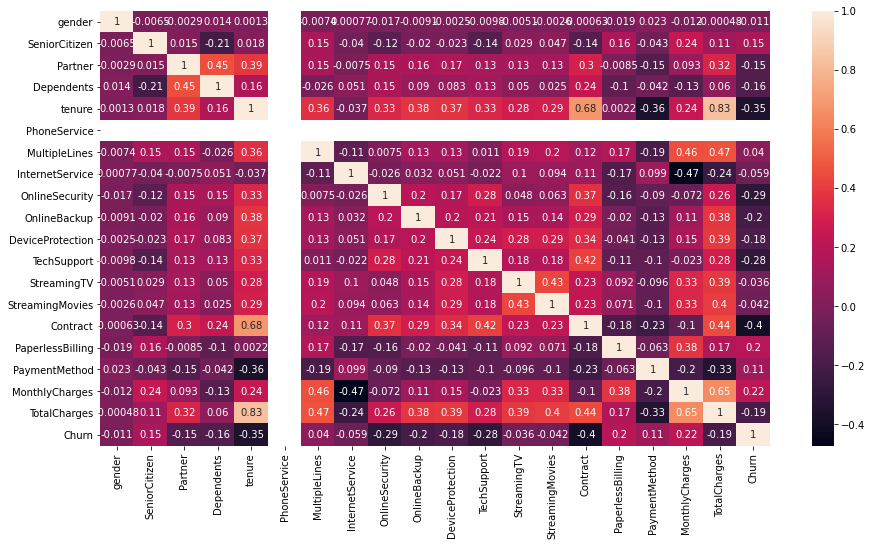

In [142]:
plt.figure(figsize=(15,8))
sns.heatmap(df_new.corr(),annot=True)

In [145]:
#removing some columns which is negatively corelated
df_new.drop(['Partner','Contract','MonthlyCharges','PhoneService'],axis=1,inplace=True)

<AxesSubplot:>

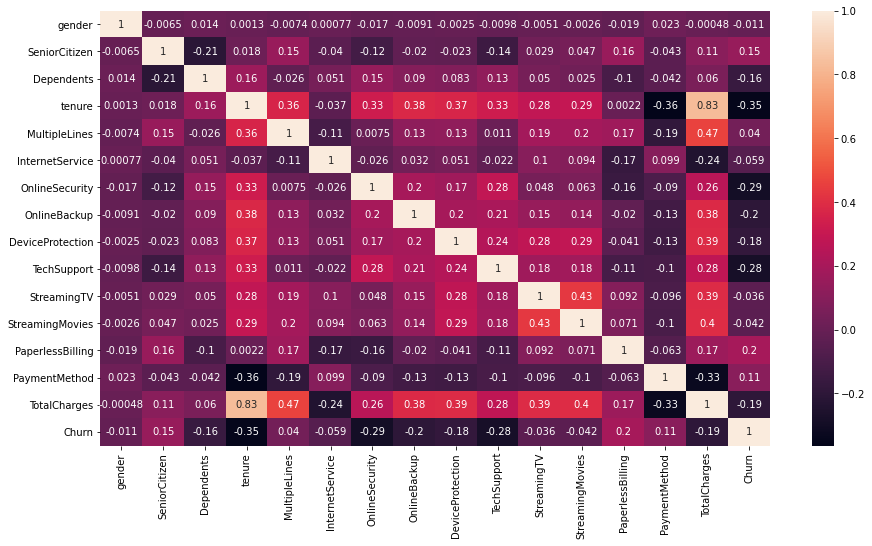

In [147]:
plt.figure(figsize=(15,8))
sns.heatmap(df_new.corr(),annot=True)

In [149]:
#splitting data into x and y
x=df_new.drop('Churn',axis=1)
y=df_new['Churn']

In [150]:
#Scaling the x 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [151]:
#balancing the data
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_balanced,y_balanced=smt.fit_resample(x_scaled,y)

In [152]:
y_balanced.value_counts()

0    4653
1    4653
Name: Churn, dtype: int64

In [153]:
#Let us import and split x y at best random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

lo=LogisticRegression()
rs=0
acsc=0

for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x_balanced,y_balanced,test_size=0.2,random_state=i)
    lo.fit(x_train,y_train)
    pred=lo.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>acsc:
        acsc=acc
        rs=i
print(f'Best score:{acsc}\n random state: {rs}')

Best score:0.7851772287862513
 random state: 262


In [154]:
x_train,x_test,y_train,y_test=train_test_split(x_balanced,y_balanced,test_size=0.2,random_state=262)

In [155]:
#importing other models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [156]:
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(f'{m}:')
    print('accuracy score:',accuracy_score(y_test,predm))
    print('confusion matrix:\n',confusion_matrix(y_test,predm))
    print('classification report:\n',classification_report(y_test,predm))
    cvscore=cross_val_score(m,x_balanced,y_balanced,cv=5)
    print('mean cv score:',cvscore.mean())
    print('\n')

LogisticRegression():
accuracy score: 0.7851772287862513
confusion matrix:
 [[676 207]
 [193 786]]
classification report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77       883
           1       0.79      0.80      0.80       979

    accuracy                           0.79      1862
   macro avg       0.78      0.78      0.78      1862
weighted avg       0.79      0.79      0.79      1862

mean cv score: 0.7623051256759386


SVC():
accuracy score: 0.8141783029001074
confusion matrix:
 [[705 178]
 [168 811]]
classification report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       883
           1       0.82      0.83      0.82       979

    accuracy                           0.81      1862
   macro avg       0.81      0.81      0.81      1862
weighted avg       0.81      0.81      0.81      1862

mean cv score: 0.7926084690501105


DecisionTreeClassifier():
accuracy score: 0

RandomForestClassifier is giving highest accuracy i.e. 85% 

In [ ]:
#Hypertunning the random forest model

In [157]:
from sklearn.model_selection import GridSearchCV
par={'n_estimators':[100,200,500],'max_depth':[10,20,50],
    'min_samples_leaf':[1,2,3],'min_samples_split':[2,5,10]}
grid=GridSearchCV(RandomForestClassifier(),param_grid=par,cv=2,verbose=True)
grid.fit(x_train,y_train)
print('score: ',grid.best_score_)
print('best estimators:',grid.best_estimator_)
print('best parameters:',grid.best_params_)

Fitting 2 folds for each of 81 candidates, totalling 162 fits
score:  0.8121977431488447
best estimators: RandomForestClassifier(max_depth=20, n_estimators=500)
best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [158]:
rf=RandomForestClassifier(n_estimators=200,max_depth=500,max_features='auto',min_samples_leaf=1,min_samples_split=2,criterion='entropy')
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('Classification Report:\n',classification_report(y_test,pred))

Accuracy score: 0.8528464017185822
Confusion Matrix:
 [[768 115]
 [159 820]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       883
           1       0.88      0.84      0.86       979

    accuracy                           0.85      1862
   macro avg       0.85      0.85      0.85      1862
weighted avg       0.85      0.85      0.85      1862



In [160]:
#AUC- ROC 
from sklearn.metrics import roc_auc_score
#Predicting the probability of having 1 in the x-test
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.25 , 0.54 , 0.385, ..., 0.   , 0.615, 0.06 ])

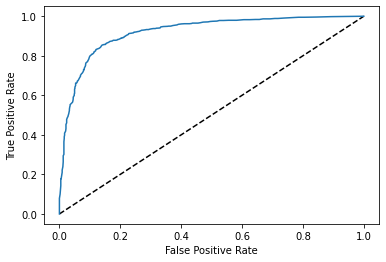

Score: 0.8536757756603278


In [161]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print('Score:',auc_score)

In [162]:
import joblib
joblib.dump(rf,'customerchurn.obj')

['customerchurn.obj']